In practice, we are going to think probabilistically using hacker statistics. The basic idea is that instead of literally repeating the data acquisition over and over again, we can simulate those repeated measurements using Python. For our first simulation, we will take a cue from our forebears. The concepts of probability originated from studies of games of chance.so we will simulate coin flips. Specifically, we will simulate the outcome of 4 successive coin flips. Our goal is to compute the probability that we will get four heads out of four flips.

To simulate a coin flip, we will use the function np dot random dot random, which draws a number between zero and one such that all numbers in this interval are equally likely to occur.

If the number we draw is less than point-5, which has a 50% chance of happening, we say we got heads, and we get tails otherwise. This type of experiment, where the result is either True (heads) or False (tails) is referred to as
a Bernoulli trial. The pseudorandom number generator works by starting with an integer, called a seed and then generates random numbers in succession. The same seed gives the same sequence of random numbers, hence the name, "psuedorandom number generation". So, if we want to have reproducible code, it is a good idea to seed the random number generator using the np dot random dot seed function.

Now, to do our coin flips, we import NumPy, seed the random number generator, and then draw four random numbers. Conveniently, we can specify how many random numbers we want with the size keyword argument. The first number we get is less than one half, so it is a heads, but the remaining three are tails. We can show that explicitly using the less than operation, which gives us an array with the Boolean value True for heads and False for tails. We can compute the number of heads by summing the array of Booleans because in numerical contexts, Python treats True at one and False as zero. We want to know the probability of getting four heads if we were to repeat the four flips over and over again. We can do this with a for loop.

We first initialize the count to zero. We then do 10,000 repeats of the four-flip trials. If a given trial had four heads, we increase the count. So, what is the probability of getting all four heads? It's the number of times we got all heads, divided by the total number of trials we did. The result is about point-06. Pascal and his friends did not have computers and worked out problems like these with pen and paper. While this particular problem is tractable, pen-and-paper statistics can get hard fast.

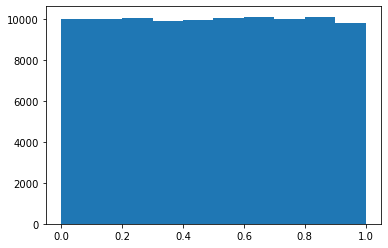

In [3]:
import numpy as  np
import matplotlib.pyplot as plt
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

One can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability  of landing heads (success) and probability  of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

In [4]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. We would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, we will do a simulation. We will perform 100 Bernoulli trials using the perform_bernoulli_trials() function  and record how many defaults we get. Here, a success is a default. (Bearing in mind that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) We will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, we will plot a histogram describing the probability of the number of defaults.

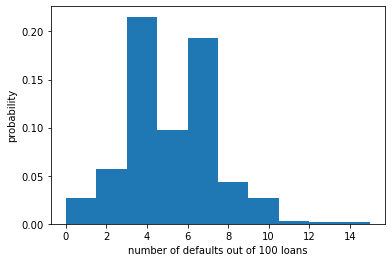

In [6]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

In [7]:

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

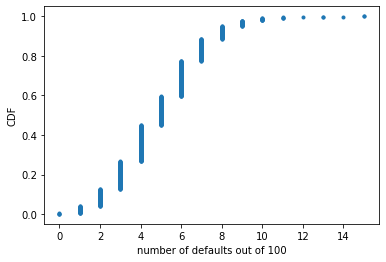

Probability of losing money = 0.022


In [8]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

Probability mass function (PMF) is defined as the set of probabilities of discrete outcomes. To understand how this works, consider a simpler story, a person rolling a die once. The outcomes are discrete because only certain values may be attained; you cannot roll a 3-point-7 with a die. Each result has the same, or uniform probability, 1/6. For this reason, the PMF associated with this story is called the Discrete Uniform PMF. Now the PMF is a property of a discrete probability distribution.

A distribution is just a mathematical description of outcomes. We can match a story to a mathematical description of probabilities, as we have just seen with the Discrete Uniform distribution.

The number r of successes in n Bernoulli trials with probability p of success is Binomially distributed. The number of heads in four coin flips matches this story, since a coin flip is a Bernoulli trial with p = point-5.

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with np.random.seed(42)) to save you typing that each time.

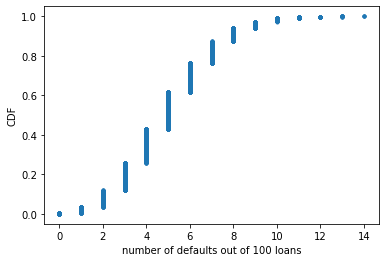

In [9]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()


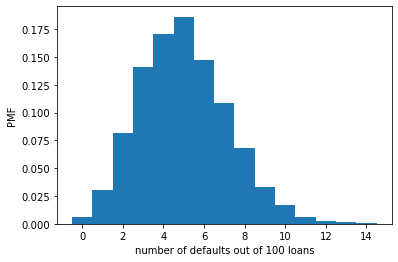

In [11]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

 If you stand at a bus stop in Poissonville, the amount of time you have to wait for a bus is completely independent of when the previous bus arrived. In other words, you would watch a bus drive off and another one will arrive almost instantly, or you could be waiting for hours. Arrival of buses in Poissonville is what we call a Poisson process. The timing of the next event is completely independent of when the previous event happened. Many real-life processes behave in this way.

For example, natural births in a given hospital are a Poisson process. There is a well-defined average number of natural births per year, and the timing of one birth is independent of the timing of the previous one. Another example is hits on a website. The timing of the next hit is independent of the timing of the last. There are countless other examples. Any process that matches the buses in Poissonville story is a Poisson process. The number of arrivals of a Poisson process in a given amount of time is Poisson distributed.

The Poisson distribution has one parameter, the average number of arrivals in a given length of time. So, to match the story, we could consider the number of hits on a website in an hour with an average of six hits per hour. This is Poisson distributed.

Poisson distribution is a limit of the Binomial distribution for low probability of success and large number of trials, ie for rare events. 

Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to `np` approximates a Binomial distribution for `n` Bernoulli trials with probability `p`  of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. We will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, we will compute the mean and standard deviation of samples from a Binomial distribution with parameters  n and p such that np = 10.

In [12]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.


How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?


This can be described using a Binomial distribution, with each game being a Bernoulli trial. Note that here, the probability of success is very small as no-hitters are especially rare events. Also recall that in such cases, the Poisson distribution is a limit of the Binomial distribution. Which is easier to model and compute? Think about how many parameters each has. Fewer parameters makes it easier to model.

When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.


Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [13]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0072


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

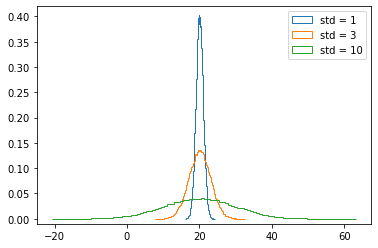

In [15]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


You can see how the different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

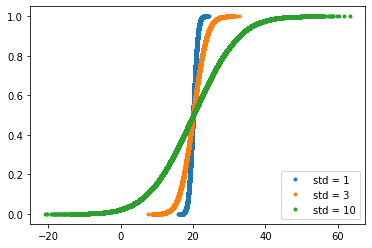

In [16]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.


Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.


In [18]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2


Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

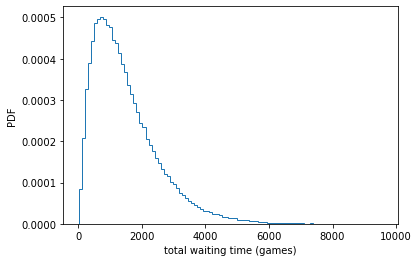

In [20]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             density=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()
